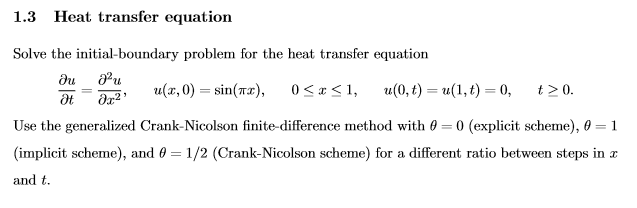

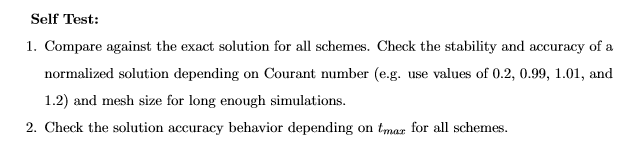

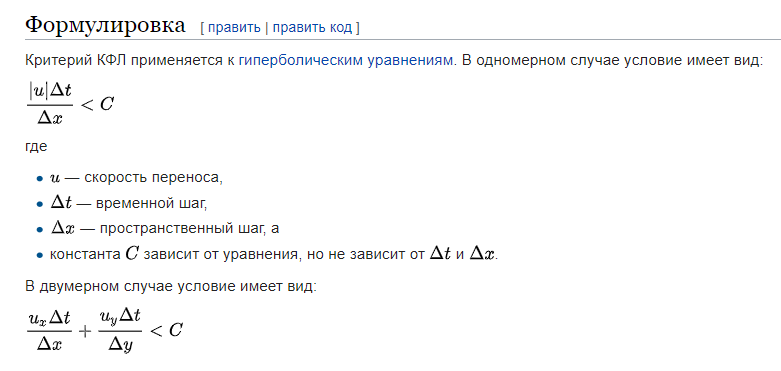

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from numba import jit
import scipy.sparse as sp
import scipy.sparse.linalg as lg

In [2]:
def Solver(T,Nx,Nt,theta):
    X0 = 0
    X1 = 1 
    
    x = np.linspace(X0,X1,Nx)
    t = np.linspace(0,T,Nt)
    u = np.zeros([Nx,Nt])
    u[:,0] = np.sin(np.pi*x)
    u[0,0] = 0
    u[Nx-1,0] = 0

    dx = x[1]-x[0]
    dt = t[1]-t[0]
    F = dt/(dx**2)
    
    A = sp.diags([-theta*F,1 + (2*F*theta),-theta*F],[-1,0,1],shape=[Nx-2,Nx-2])
    A = sp.csc_matrix(A)
    
    for n in range(0,Nt-1):
        B = np.zeros(Nx-2)
        for i in range(1,Nx-1):
            B[i-1] = u[i,n] + (F*(1-theta)*(u[i+1,n]-2*u[i,n]+u[i-1,n]))
        if np.isclose(0,theta):
            u[1:-1,n+1] = B
        else:
            u[1:-1,n+1] = lg.spsolve(A,B)
    return x,t,u,F


In [66]:
import pylab
T = 1
Nx = 101
Nt = 2*10001

x,t,u00,F = Solver(T,Nx,Nt,0)
x,t,u05,F = Solver(T,Nx,Nt,0.5)
x,t,u10,F = Solver(T,Nx,Nt,1)

X,T = np.meshgrid(x,t)
u_ = np.sin(np.pi*X)*np.exp(-(np.pi**2)*T)

# print(dtx)

# dx = x[1]-x[0]
# dt = t[1]-t[0]
# F = dt/(dx**2)
print(F)

0.4999750012499375


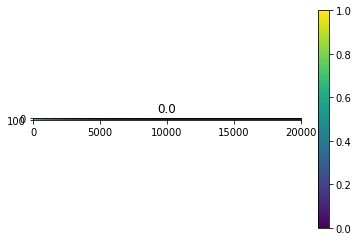

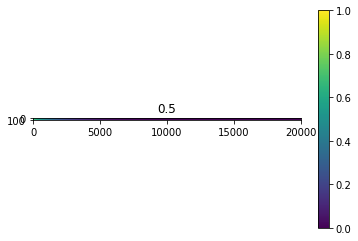

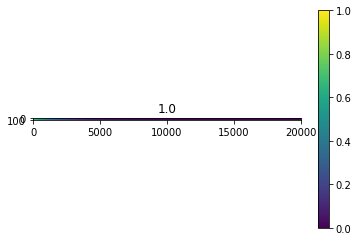

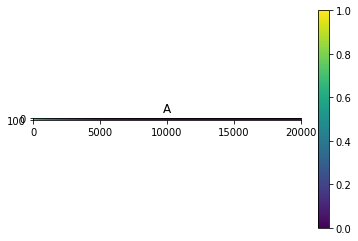

In [67]:
plt.figure()
plt.imshow(u00,vmin=0, vmax=1)
plt.title('0.0')
plt.colorbar()

plt.figure()
plt.imshow(u05)
plt.title('0.5')
plt.colorbar()

plt.figure()
plt.imshow(u10)
plt.title('1.0')
plt.colorbar()

plt.figure()
plt.imshow(u_.T,)
plt.title('A')
plt.colorbar()

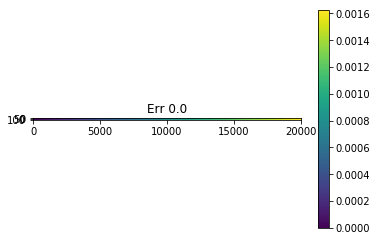

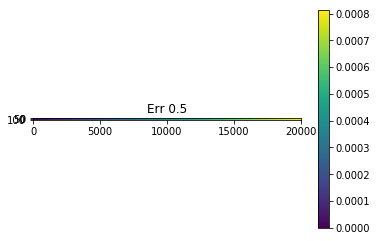

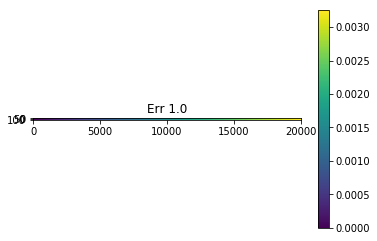

In [68]:
plt.figure()
plt.imshow(abs(u00[1:-1,:]-(u_.T[1:-1,:]))/u_.T[1:-1,:])
plt.title('Err 0.0')
plt.colorbar()

plt.figure()
plt.imshow(abs(u05[1:-1,:]-(u_.T[1:-1,:]))/u_.T[1:-1,:])
plt.title('Err 0.5')
plt.colorbar()

plt.figure()
plt.imshow(abs(u10[1:-1,:]-(u_.T[1:-1,:]))/u_.T[1:-1,:])
plt.title('Err 1.0')
plt.colorbar()



In [28]:
Nx = 30
Nt = 30
T = 1

Farr = 2
Tarr = Nt*Farr*(Nx**(-2))
#Ntarr = T/(Farr*(Nx**(-2)))

Narr = np.arange(10,200,10)

Tarr = np.double(Narr)*Farr*(np.double(Narr)**(-2))

Err00 = np.zeros_like(Narr,dtype=np.double())
Err05 = np.zeros_like(Narr,dtype=np.double())
Err10 = np.zeros_like(Narr,dtype=np.double())



for i in range(np.size(Narr)):
    x,t,u00,dtx = Solver(Tarr[i],Narr[i],Narr[i],0.0)
    x,t,u05,dtx = Solver(Tarr[i],Narr[i],Narr[i],0.5)
    x,t,u10,dtx = Solver(Tarr[i],Narr[i],Narr[i],1.0)
    
    X1,T1 = np.meshgrid(x,t)
    u_ = np.sin(np.pi*X1)*np.exp(-(np.pi**2)*T1)
    Err00[i] = np.sqrt(np.mean((u00-u_)**2))/(Narr[i]**2)
    Err05[i] = np.sqrt(np.mean((u05-u_)**2))/(Narr[i]**2)
    Err10[i] = np.sqrt(np.mean((u10-u_)**2))/(Narr[i]**2)


Text(0, 0.5, 'Err')

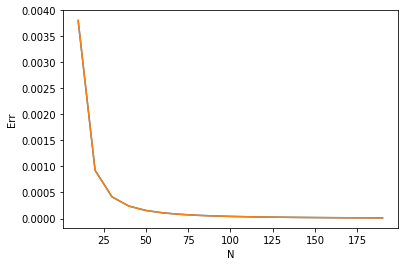

In [30]:
# plt.plot(Narr,Err00)
plt.plot(Narr,Err05)
plt.plot(Narr,Err10)

plt.xlabel('N')
plt.ylabel('Err')

#plt.yscale('log')
#plt.xscale('log')

#plt.ylim(0.4,0.45)
#plt.xlim(0,2)

In [131]:
1/(Nx+1)

0.00980392156862745

In [15]:
Err00

array([], dtype=int32)

Nx = 11
F = 0.1
.03 .08 .12
.0002 .0008 .0012
F = 0.5
.14 .08 .35
.001 .0008 .003
F = 1.0
nan .07 .7
nan .0008 .005
F = 2.5
nan .03 2.
--------------
Nx = 101
F = 0.1

F = 0.5

F = 1.0